# Inputs and Correlations (based on Xavier's notebook)

Accessing the old files not possible, so start over with other QCD files

### Loading modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
import uproot    # uproot version3? Will try uproot4 then
import uproot4

### Plot styling

In [2]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.rcParams.label.data = True
hep.rcParams.label.paper = False

### Opening the files

##### First one of the new set of QCD files

In [3]:
file = "root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/user/anovak/PFNano/106X_v2_17/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1PFNanoV2/210101_173148/0001/nano_mc2017_1-1048.root"

In [4]:
tree = uproot4.open(file, library='pd')['Events']
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'btagWeight_CSVV2',
 'btagWeight_DeepCSVB',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'CorrT1METJet_area',
 'CorrT1METJet_eta',
 'CorrT1METJet_muonSubtrFactor',
 'CorrT1METJet_phi',
 'CorrT1METJet_rawPt',
 'nJetPFCands',
 'JetPFCands_pt',
 'JetPFCands_btagEtaRel',
 'JetPFCands_btagPtRatio',
 'JetPFCands_btagPParRatio',
 'JetPFCands_btagSip3dVal',
 'JetPFCands_btagSip3dSig',
 'JetPFCands_btagJetDistVal',
 'JetPFCands_pFCandsIdx',
 'JetPFCands_jetIdx',
 'nJetSVs',
 '

## Just replicating the method with Xavier's file then

In [50]:
jet_input_branches = ["event", "Jet_pt","Jet_eta", "Jet_hadronFlavour", "Jet_btagDeepB", "Jet_btagDeepFlavB"]
deepCSV_input_branches = [x for x in tree.keys() if 'Jet_DeepCSV' in x]
jet_input_branches.extend(deepCSV_input_branches)
deepCSV_input_branches = ["Jet_pt", "Jet_eta"] + deepCSV_input_branches

In [51]:
df = tree.arrays(jet_input_branches, library='pd')
df.unstack()
df

event      Jet_pt   Jet_eta  Jet_hadronFlavour  \
entry subentry                                                       
0     0          76071929  671.500000 -0.122818                  0   
      1          76071929  448.500000  0.105759                  0   
      2          76071929  270.750000 -0.360352                  0   
      3          76071929   41.687500 -0.462341                  0   
1     0          76071845  400.750000 -0.002752                  0   
...                   ...         ...       ...                ...   
7738  4         174676315   27.671875  2.825684                  0   
      5         174676315   23.281250 -2.705078                  0   
      6         174676315   20.093750  0.387329                  0   
      7         174676315   19.109375 -3.816406                  0   
      8         174676315   16.796875 -1.479736                  0   

                Jet_btagDeepB  Jet_btagDeepFlavB  \
entry subentry                                     
0     0              0.112854           0.086853   
      1              0.030960           0.021286   
      2              0.048584           0.020294   
      3              0.071228           0.332520   
1     0              0.025467           0.014442   
...                       ...                ...   
7738  4             -1.000000           0.207275   
      5              0.194458           0.283691   
      6             -1.000000           0.041840   
      7             -1.000000           0.192505   
      8              0.137573           0.104614   

                Jet_DeepCSV_flightDistance2dSig  \
entry subentry                                    
0     0                               20.640625   
      1                             -999.000000   
      2                                3.375000   
      3                                4.468750   
1     0                             -999.000000   
...                                         ...   
7738  4                             -999.000000   
      5                             -999.000000   
      6                             -999.000000   
      7                             -999.000000   
      8                             -999.000000   

                Jet_DeepCSV_flightDistance2dVal  \
entry subentry                                    
0     0                                1.925781   
      1                             -999.000000   
      2                                0.131958   
      3                                0.060944   
1     0                             -999.000000   
...                                         ...   
7738  4                             -999.000000   
      5                             -999.000000   
      6                             -999.000000   
      7                             -999.000000   
      8                             -999.000000   

                Jet_DeepCSV_flightDistance3dSig  \
entry subentry                                    
0     0                               20.671875   
      1                             -999.000000   
      2                                3.345703   
      3                                4.500000   
1     0                             -999.000000   
...                                         ...   
7738  4                             -999.000000   
      5                             -999.000000   
      6                             -999.000000   
      7                             -999.000000   
      8                             -999.000000   

                Jet_DeepCSV_flightDistance3dVal  ...  \
entry subentry                                   ...   
0     0                                2.015625  ...   
      1                             -999.000000  ...   
      2                                0.137939  ...   
      3                                0.067749  ...   
1     0                             -999.000000  ...   
...                                         ... 

In [52]:
df = df[(df['Jet_pt']>25) & (abs(df['Jet_eta'])<2.5)]

In [53]:
df = df.reset_index()

### Cleaning of the deepCSV inputs

In [54]:
pd.options.mode.use_inf_as_na = False

In [55]:
df[deepCSV_input_branches]

,Jet_pt,Jet_eta,Jet_DeepCSV_flightDistance2dSig,Jet_DeepCSV_flightDistance2dVal,Jet_DeepCSV_flightDistance3dSig,Jet_DeepCSV_flightDistance3dVal,Jet_DeepCSV_trackDecayLenVal_0,Jet_DeepCSV_trackDecayLenVal_1,Jet_DeepCSV_trackDecayLenVal_2,Jet_DeepCSV_trackDecayLenVal_3,...,Jet_DeepCSV_trackSumJetDeltaR,Jet_DeepCSV_trackSumJetEtRatio,Jet_DeepCSV_vertexCategory,Jet_DeepCSV_vertexEnergyRatio,Jet_DeepCSV_vertexJetDeltaR,Jet_DeepCSV_vertexMass,Jet_DeepCSV_jetNSecondaryVertices,Jet_DeepCSV_jetNSelectedTracks,Jet_DeepCSV_jetNTracksEtaRel,Jet_DeepCSV_vertexNTracks
0,671.50000,-0.122818,20.640625,1.925781,20.671875,2.015625,0.040619,0.002913,2.525330e-03,3.137207e-02,...,0.015335,0.459961,0.0,0.014397,0.187744,0.617188,1,14,2,2
1,448.50000,0.105759,-999.000000,-999.000000,-999.000000,-999.000000,0.173706,0.027267,6.683350e-03,9.315491e-03,...,0.005322,0.380615,2.0,-999.000000,-999.000000,-999.000000,0,9,0,0
2,270.75000,-0.360352,3.375000,0.131958,3.345703,0.137939,0.030930,0.011078,9.832764e-02,7.708740e-02,...,0.004868,0.499512,0.0,0.140747,0.066162,1.732422,1,4,4,4
3,41.68750,-0.462341,4.468750,0.060944,4.500000,0.067749,0.056519,0.003979,6.580353e-03,8.062744e-02,...,0.181763,4.453125,0.0,0.236938,0.072998,5.492188,2,7,4,4
4,400.75000,-0.002752,-999.000000,-999.000000,-999.000000,-999.000000,0.022736,0.052002,8.468628e-03,6.362915e-03,...,0.013580,0.711426,1.0,0.029877,0.102783,0.333496,0,14,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34474,121.81250,1.252441,-999.000000,-999.000000,-999.000000,-999.000000,0.034302,0.000334,2.838135e-02,4.959106e-02,...,0.004467,0.540527,2.0,-999.000000,-999.000000,-999.000000,0,6,0,0
34475,56.59375,0.584351,2.384766,0.013908,2.455078,0.016937,0.008575,0.027359,9.737015e-04,6.614685e-03,...,0.019012,0.599609,0.0,0.524414,0.275391,5.261719,1,7,4,4
34476,554.50000,1.015625,-999.000000,-999.000000,-999.000000,-999.000000,0.684082,0.006989,2.350989e-38,1.447557e-38,...,0.004997,0.146362,2.0,-999.000000,-999.000000,-999.000000,0,2,0,0
34477,409.50000,-0.570190,2.705078,0.068420,2.736328,0.079041,0.051300,0.045319,1.351166e-02,2.285767e-02,...,0.007549,0.494385,0.0,0.559570,0.036346,5.527344,1,9,7,7


In [56]:
# Typical uncleaned data
df['Jet_DeepCSV_trackDecayLenVal_4'].describe()

count    3.380600e+04
mean              inf
std               inf
min     -1.701412e+38
25%      2.756192e-24
50%      1.498413e-02
75%      6.048584e-02
max      6.812293e+37
Name: Jet_DeepCSV_trackDecayLenVal_4, dtype: float64

In [57]:
pd.options.mode.use_inf_as_na = True

In [58]:
df['Jet_DeepCSV_trackDecayLenVal_4'].describe()

count    3.380600e+04
mean              NaN
std               NaN
min     -1.701412e+38
25%      2.756192e-24
50%      1.498413e-02
75%      6.048584e-02
max      6.812293e+37
Name: Jet_DeepCSV_trackDecayLenVal_4, dtype: float64

In [59]:
df[deepCSV_input_branches].isna().mean().tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005916644914295658,
 0.0034513762000058005,
 0.019519127584906756,
 0.01592273557817802,
 0.0,
 0.0,
 0.005916644914295658,
 0.0034513762000058005,
 0.019519127584906756,
 0.01592273557817802,
 0.0,
 0.0,
 0.008236897821862583,
 0.004263464717654224,
 0.0,
 0.0,
 0.005916644914295658,
 0.0034513762000058005,
 0.019519127584906756,
 0.01592273557817802,
 0.0,
 0.0,
 0.0,
 0.005916644914295658,
 0.0034513762000058005,
 0.019519127584906756,
 0.01592273557817802,
 0.0,
 0.0,
 0.005916644914295658,
 0.0034513762000058005,
 0.019519127584906756,
 0.01592273557817802,
 0.0,
 0.0,
 0.0,
 0.005916644914295658,
 0.0034513762000058005,
 0.019519127584906756,
 0.01592273557817802,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005916644914295658,
 0.0034513762000058005,
 0.019519127584906756,
 0.01592273557817802,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [60]:
df = df.fillna(-999)

In [61]:
df[deepCSV_input_branches].isna().mean().tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [62]:
df = df.applymap(lambda x: -999 if x < -999 else x)
df = df.applymap(lambda x: -999 if x > 1000 else x)

In [63]:
df.describe()

,entry,subentry,event,Jet_pt,Jet_eta,Jet_hadronFlavour,Jet_btagDeepB,Jet_btagDeepFlavB,Jet_DeepCSV_flightDistance2dSig,Jet_DeepCSV_flightDistance2dVal,...,Jet_DeepCSV_trackSumJetDeltaR,Jet_DeepCSV_trackSumJetEtRatio,Jet_DeepCSV_vertexCategory,Jet_DeepCSV_vertexEnergyRatio,Jet_DeepCSV_vertexJetDeltaR,Jet_DeepCSV_vertexMass,Jet_DeepCSV_jetNSecondaryVertices,Jet_DeepCSV_jetNSelectedTracks,Jet_DeepCSV_jetNTracksEtaRel,Jet_DeepCSV_vertexNTracks
count,34479.000000,34479.000000,34479.0,34479.000000,34479.000000,34479.000000,34479.000000,34479.000000,34479.000000,34479.000000,...,34479.000000,34479.000000,34479.000000,34479.000000,34479.000000,34479.000000,34479.000000,34479.000000,34479.000000,34479.000000
mean,-807.438412,2.110009,-999.0,252.722607,0.001081,0.541518,0.089139,0.085073,-652.797305,-656.673189,...,-2.725652,-2.248688,-1.512979,-615.908165,-616.007912,-613.411867,0.426811,6.698106,1.522492,1.522492
std,510.832587,1.846789,0.0,203.935091,1.154646,1.438335,0.216921,0.187782,480.054822,474.253519,...,52.644612,52.669709,52.716463,485.897970,485.771146,489.117390,0.673882,3.769532,2.435908,2.435908
min,-999.000000,0.000000,-999.0,25.015625,-2.499023,0.000000,-1.000000,0.001214,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.000000,0.000000
25%,-999.000000,1.000000,-999.0,56.953125,-0.874878,0.000000,0.026764,0.008636,-999.000000,-999.000000,...,0.008751,0.395996,0.000000,-999.000000,-999.000000,-999.000000,0.000000,4.000000,0.000000,0.000000
50%,-999.000000,2.000000,-999.0,192.625000,0.003799,0.000000,0.046722,0.017990,-999.000000,-999.000000,...,0.018448,0.538574,2.000000,-999.000000,-999.000000,-999.000000,0.000000,6.000000,0.000000,0.000000
75%,-999.000000,3.000000,-999.0,443.250000,0.877075,0.000000,0.103394,0.055084,3.038086,0.057983,...,0.039597,0.672852,2.000000,0.178589,0.055542,1.932617,1.000000,9.000000,2.000000,2.000000
max,1000.000000,13.000000,-999.0,867.500000,2.499512,5.000000,0.999512,0.999512,780.000000,2.498047,...,3.912109,4.910156,2.000000,79.875000,0.300049,183.750000,7.000000,26.000000,25.000000,25.000000


### Correlation map of deepCSV inputs
#### Default = -999

In [64]:
corr = df[deepCSV_input_branches].corr()

In [65]:
arr_corr = corr.to_numpy()

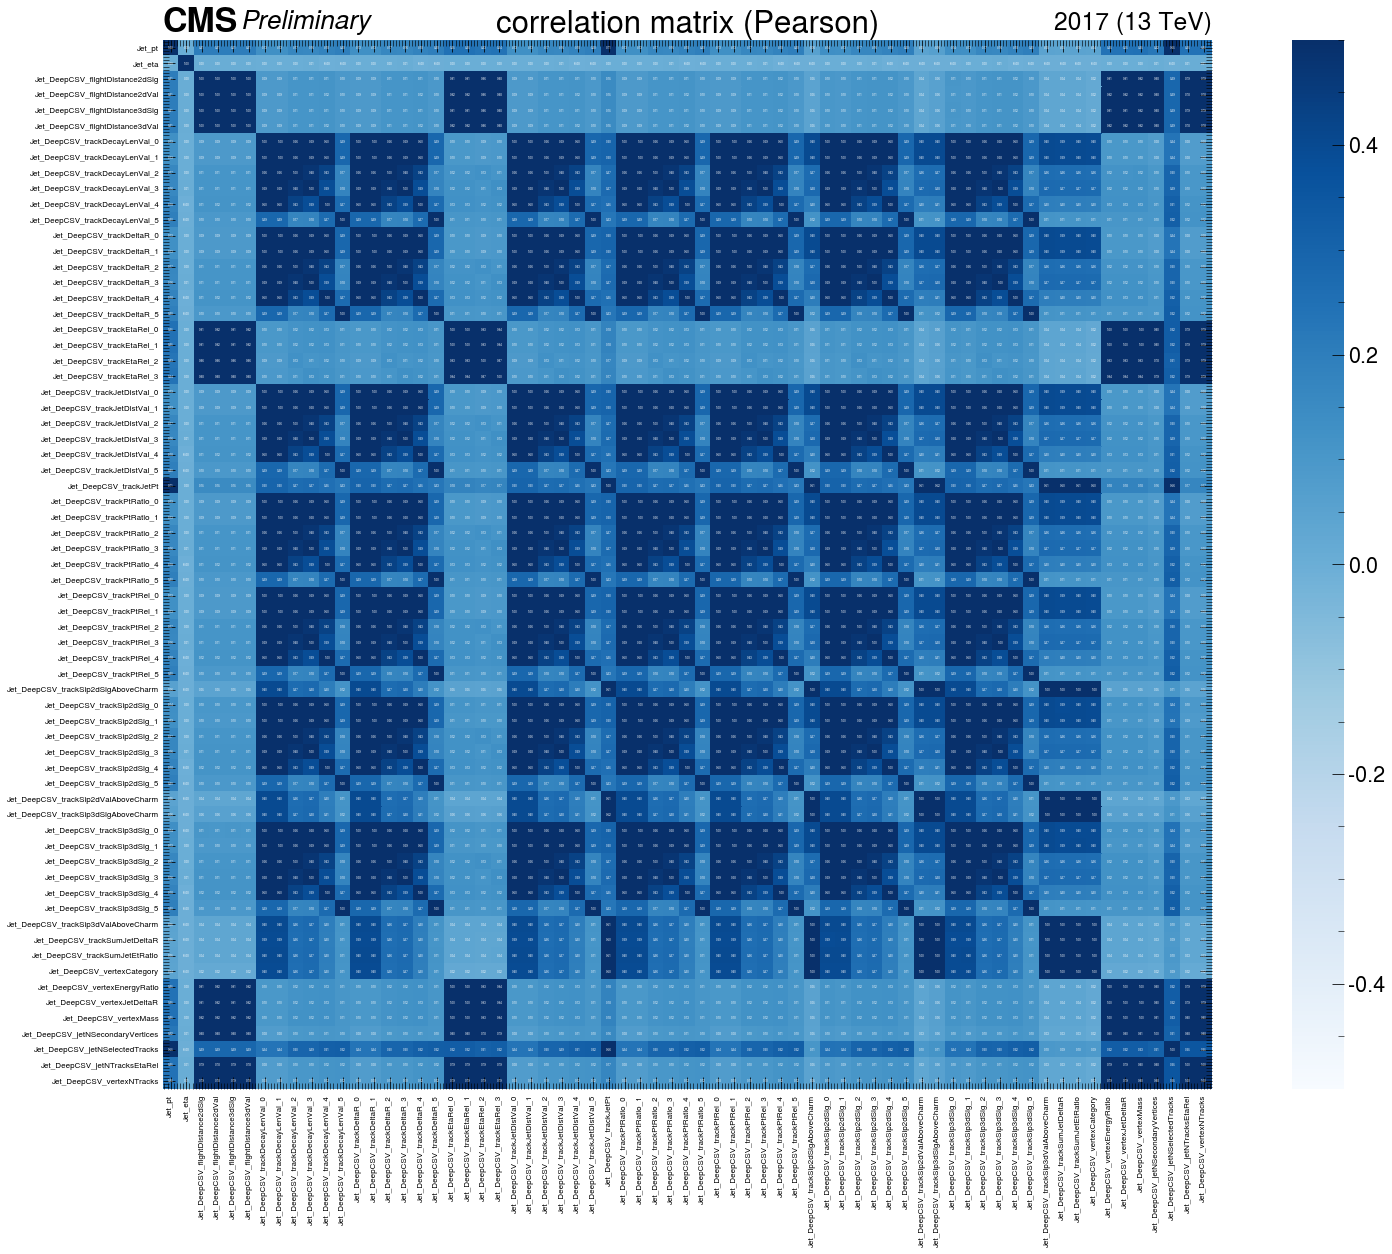

In [66]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Pearson)')
plt.tight_layout()

In [67]:
corr = df[deepCSV_input_branches].corr('kendall')

In [68]:
arr_corr = corr.to_numpy()

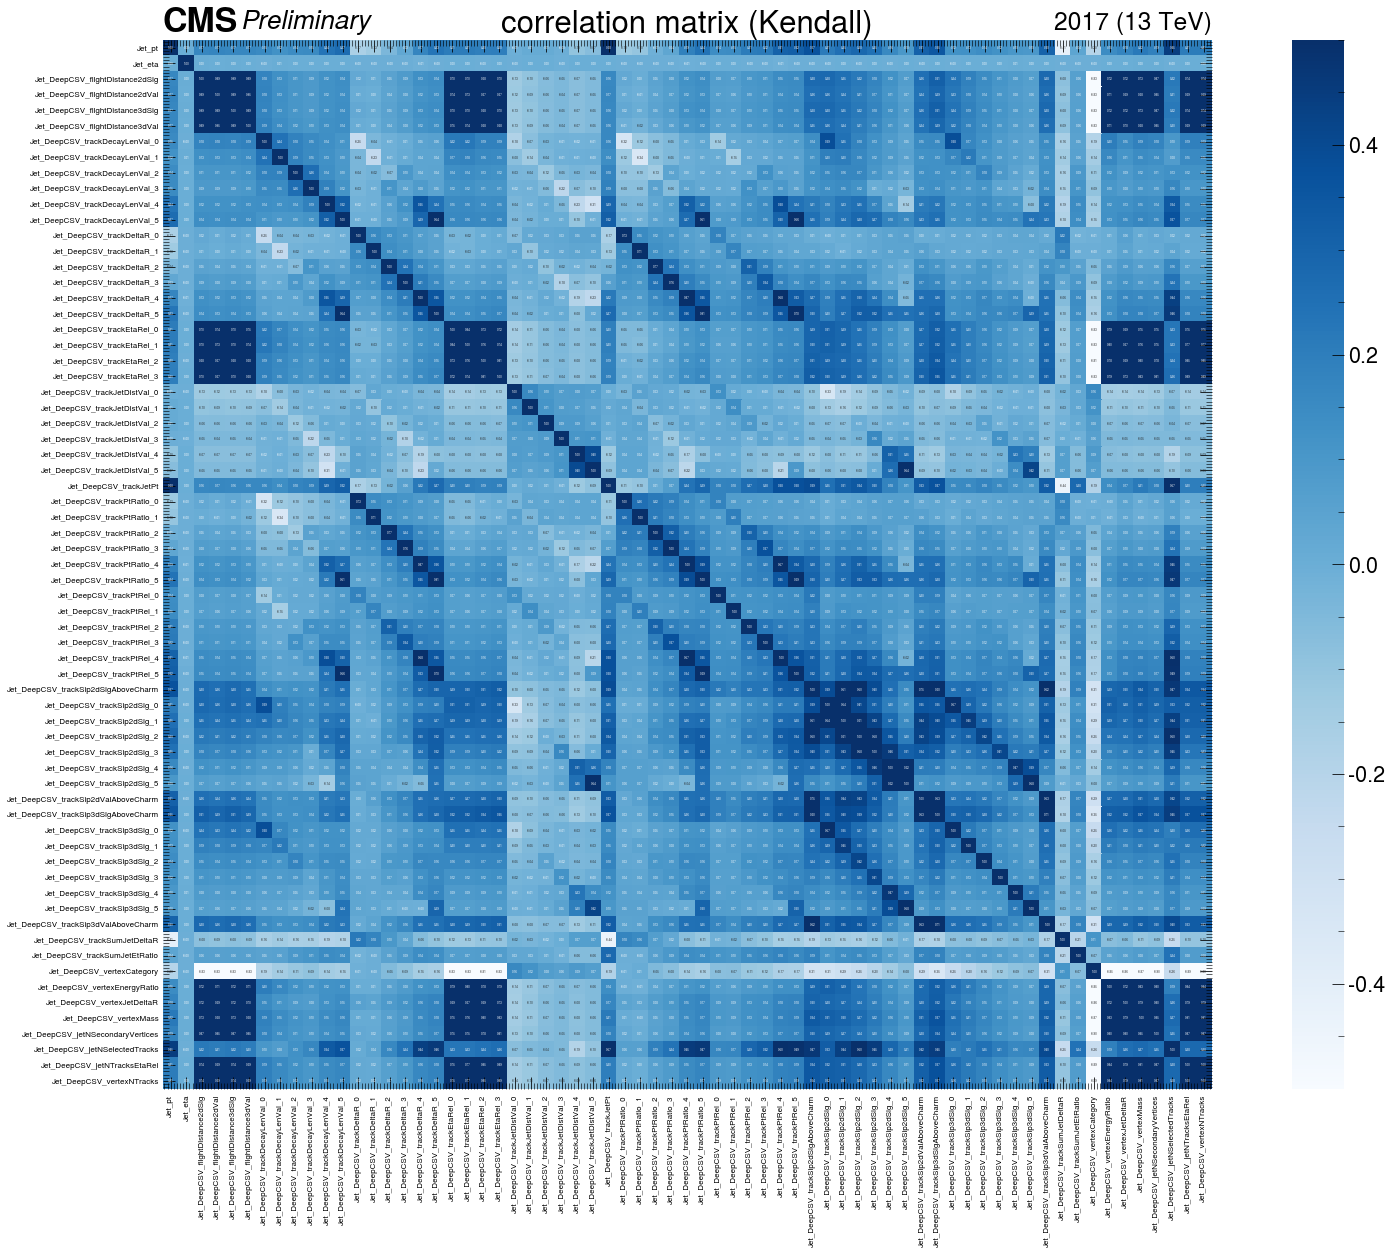

In [69]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Kendall)')
plt.tight_layout()

In [70]:
corr = df[deepCSV_input_branches].corr('spearman')

In [71]:
arr_corr = corr.to_numpy()

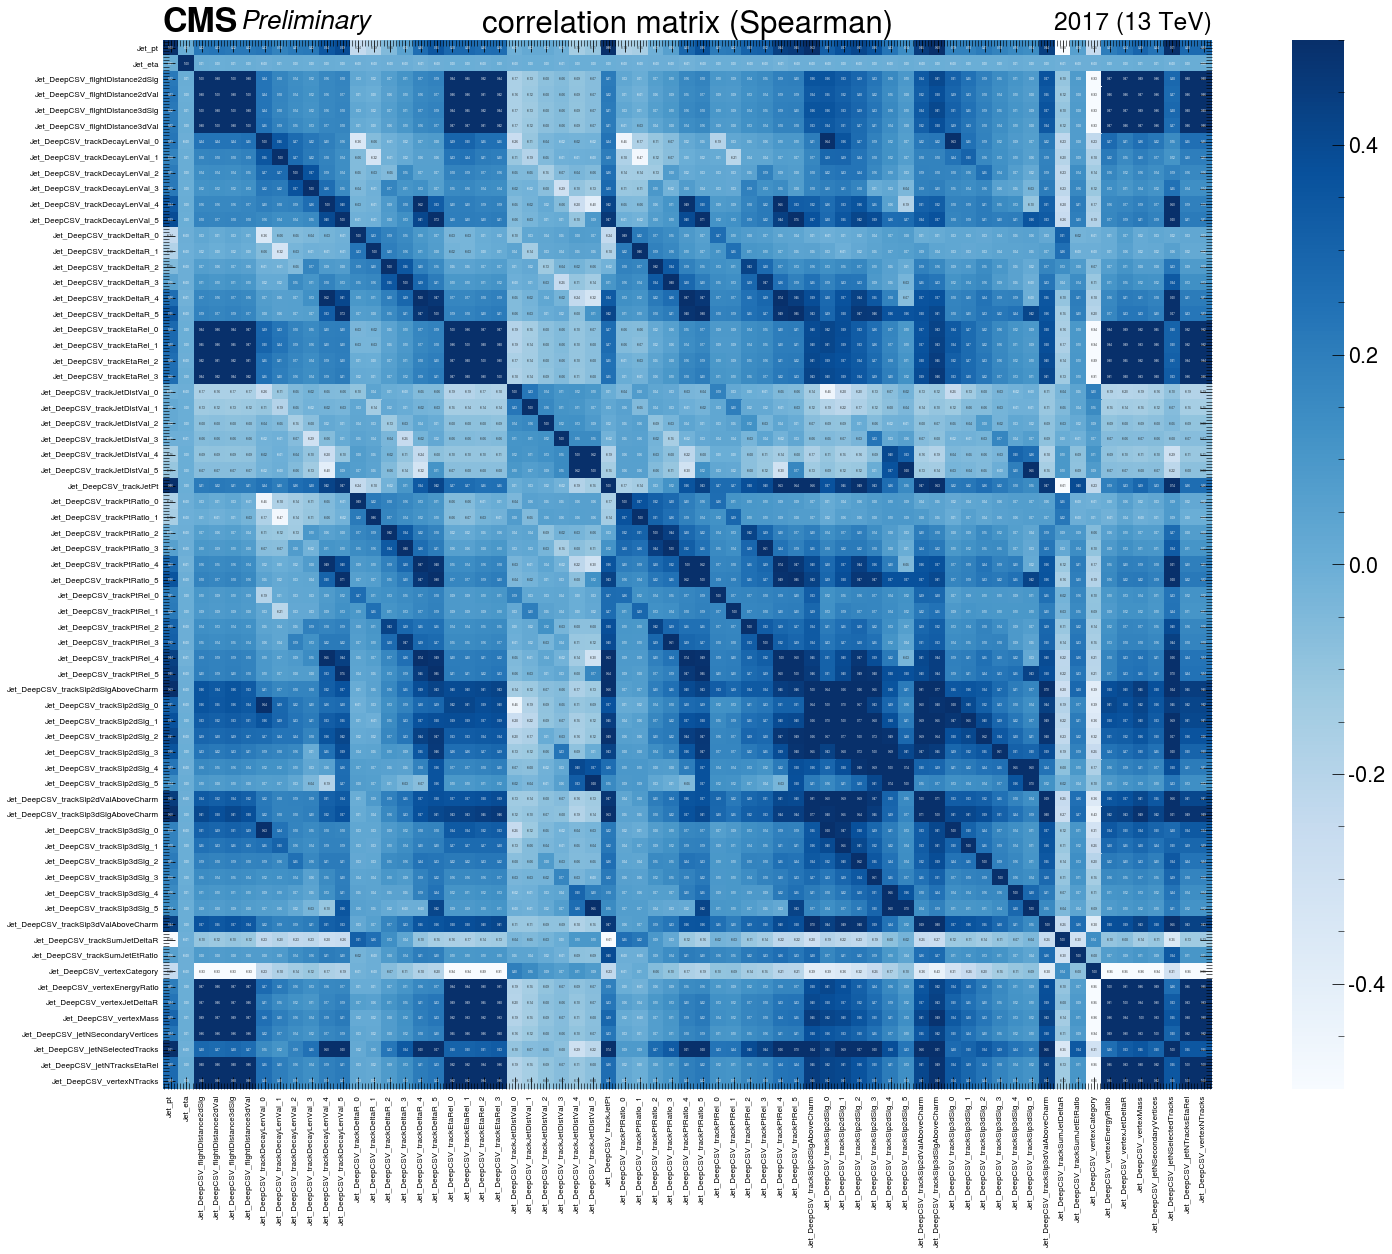

In [72]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Spearman)')
plt.tight_layout()

#### Default = -10

In [73]:
df = df.applymap(lambda x: -10 if (x == -999) else x)

In [74]:
corr = df[deepCSV_input_branches].corr()

In [75]:
arr_corr = corr.to_numpy()

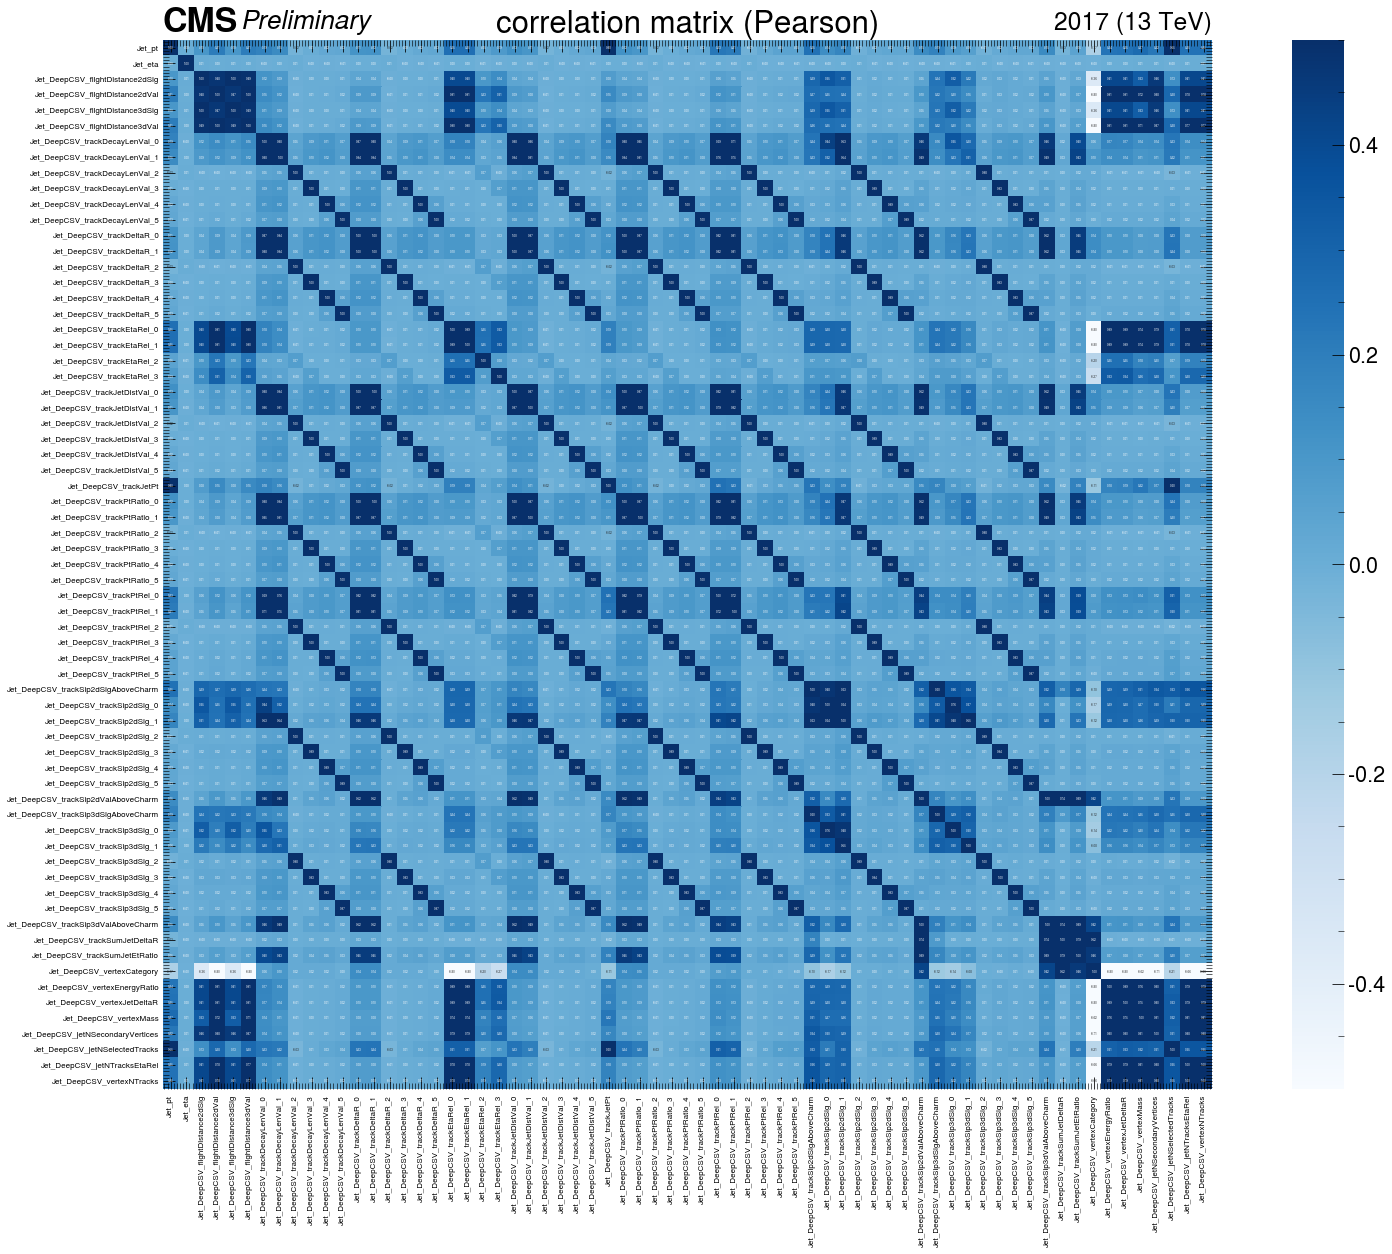

In [76]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Pearson)')
plt.tight_layout()

In [77]:
corr = df[deepCSV_input_branches].corr('kendall')

In [78]:
arr_corr = corr.to_numpy()

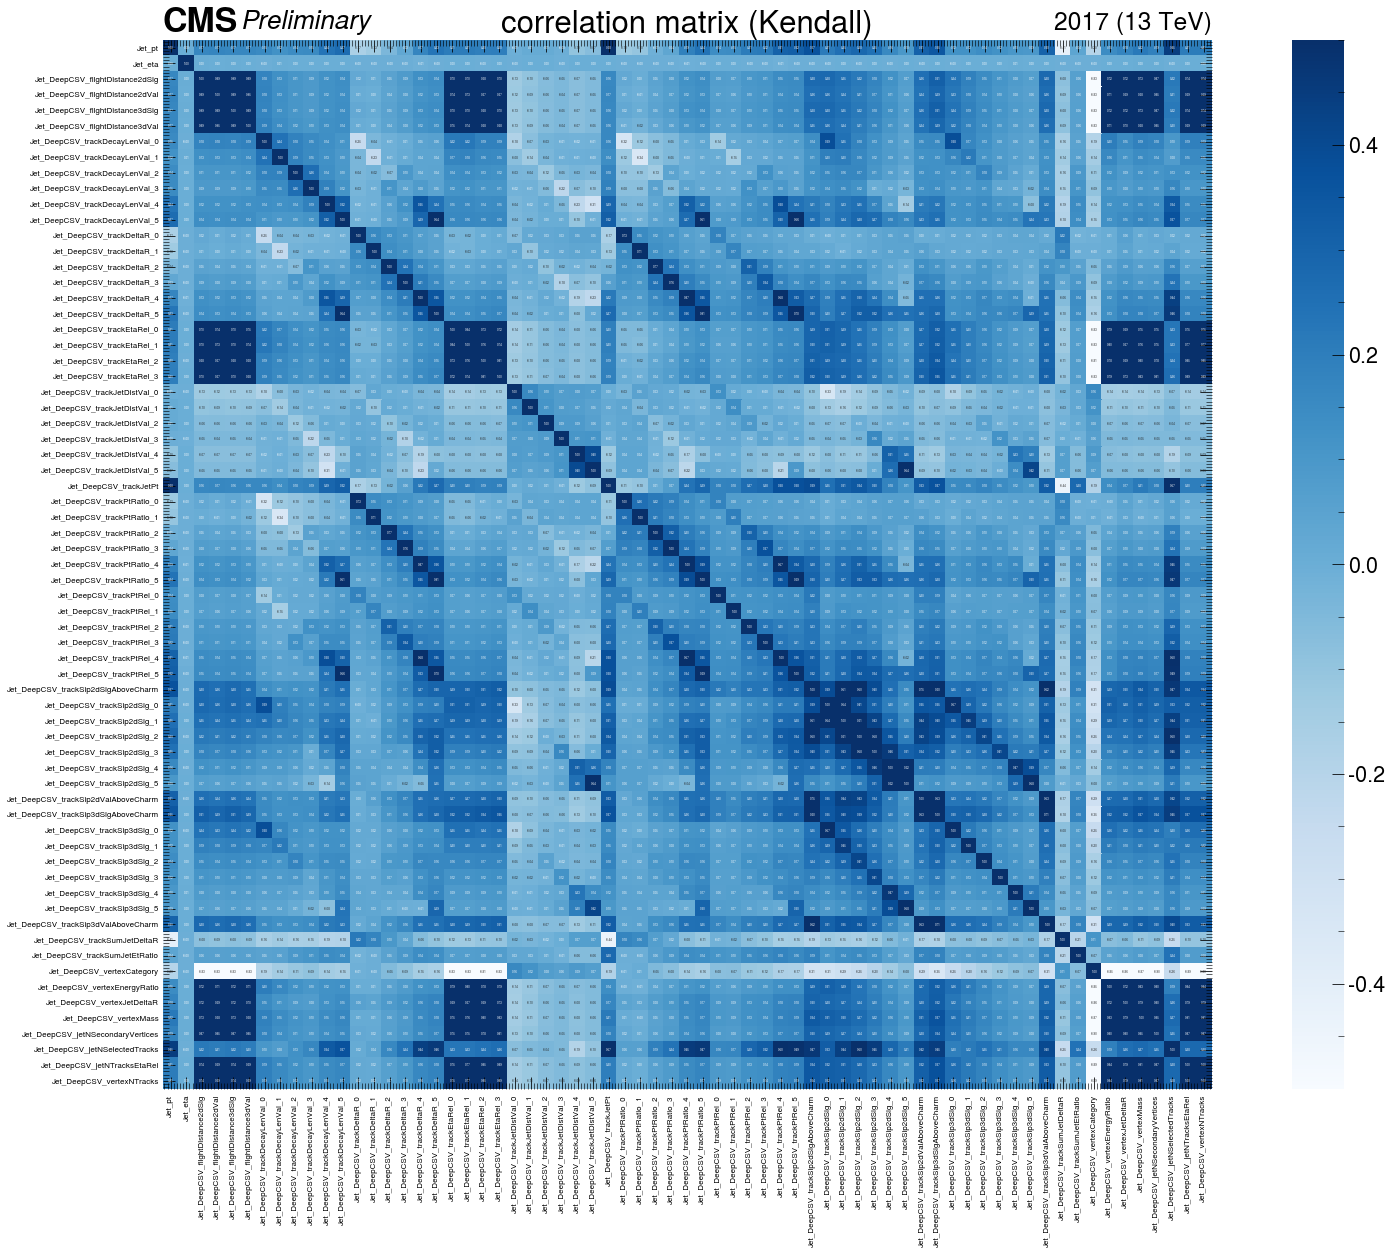

In [79]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Kendall)')
plt.tight_layout()

In [80]:
corr = df[deepCSV_input_branches].corr('spearman')

In [81]:
arr_corr = corr.to_numpy()

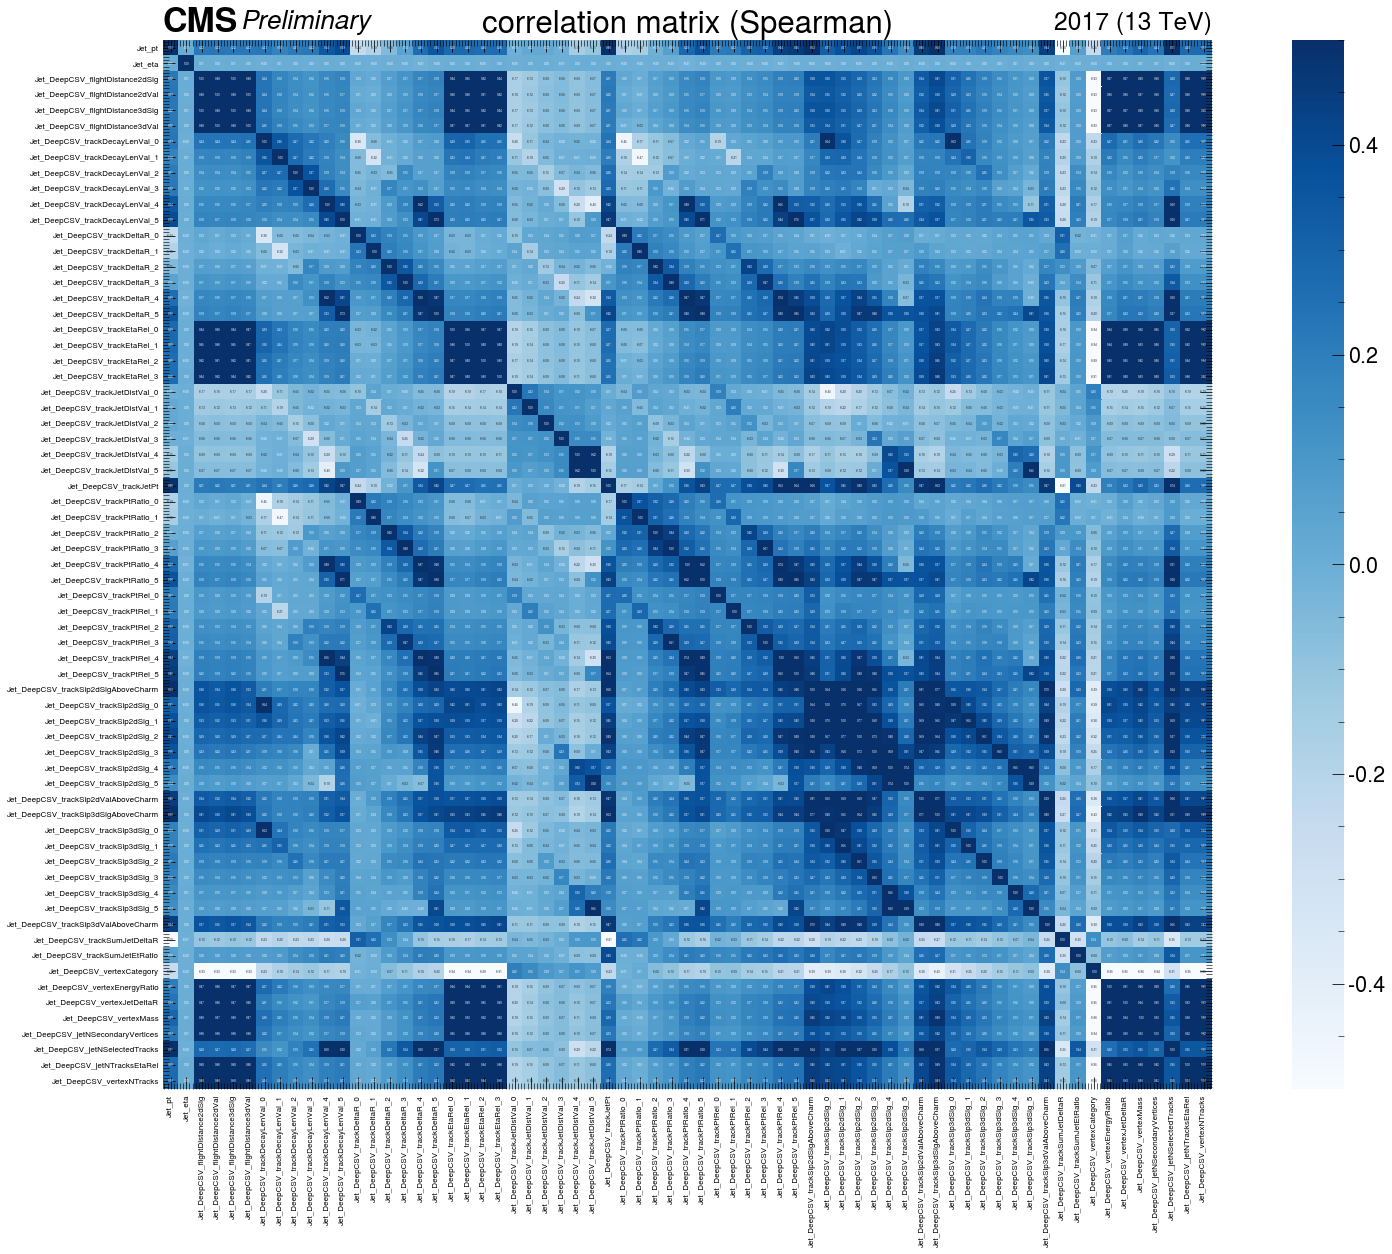

In [82]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Spearman)')
plt.tight_layout()

#### Default = 0

In [83]:
df = df.applymap(lambda x: 0 if (x == -999) else x)

In [84]:
corr = df[deepCSV_input_branches].corr()

In [85]:
arr_corr = corr.to_numpy()

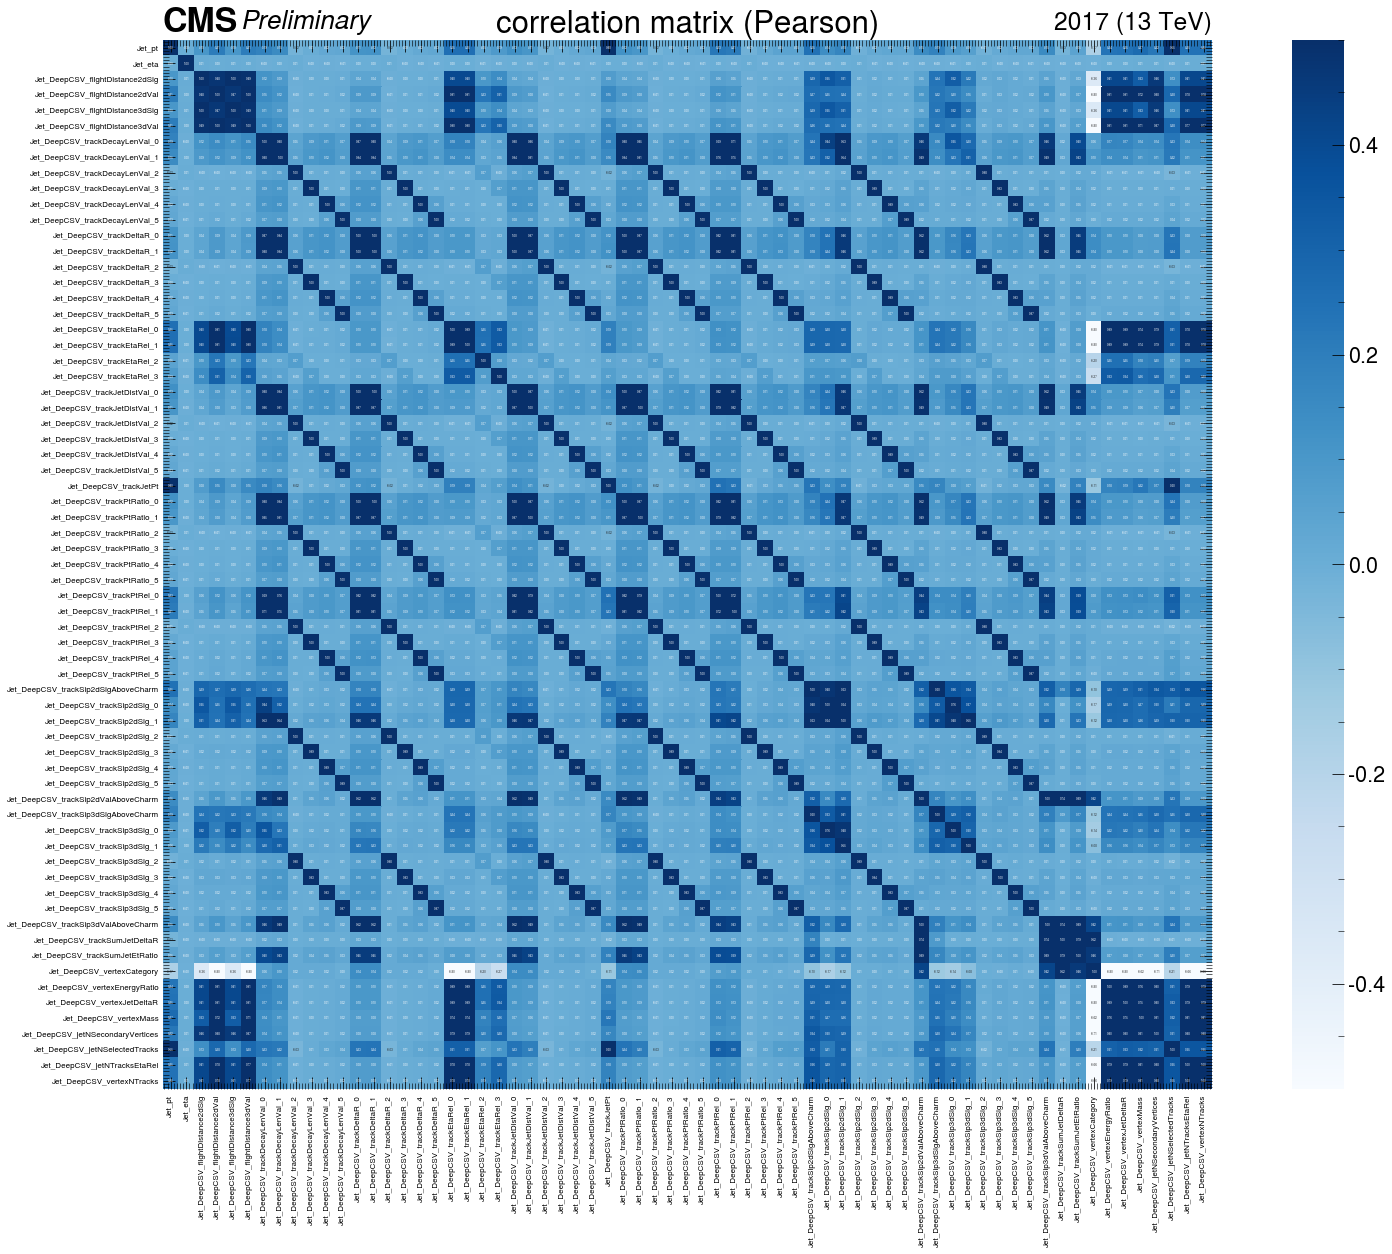

In [86]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Pearson)')
plt.tight_layout()

In [87]:
corr = df[deepCSV_input_branches].corr('kendall')

In [88]:
arr_corr = corr.to_numpy()

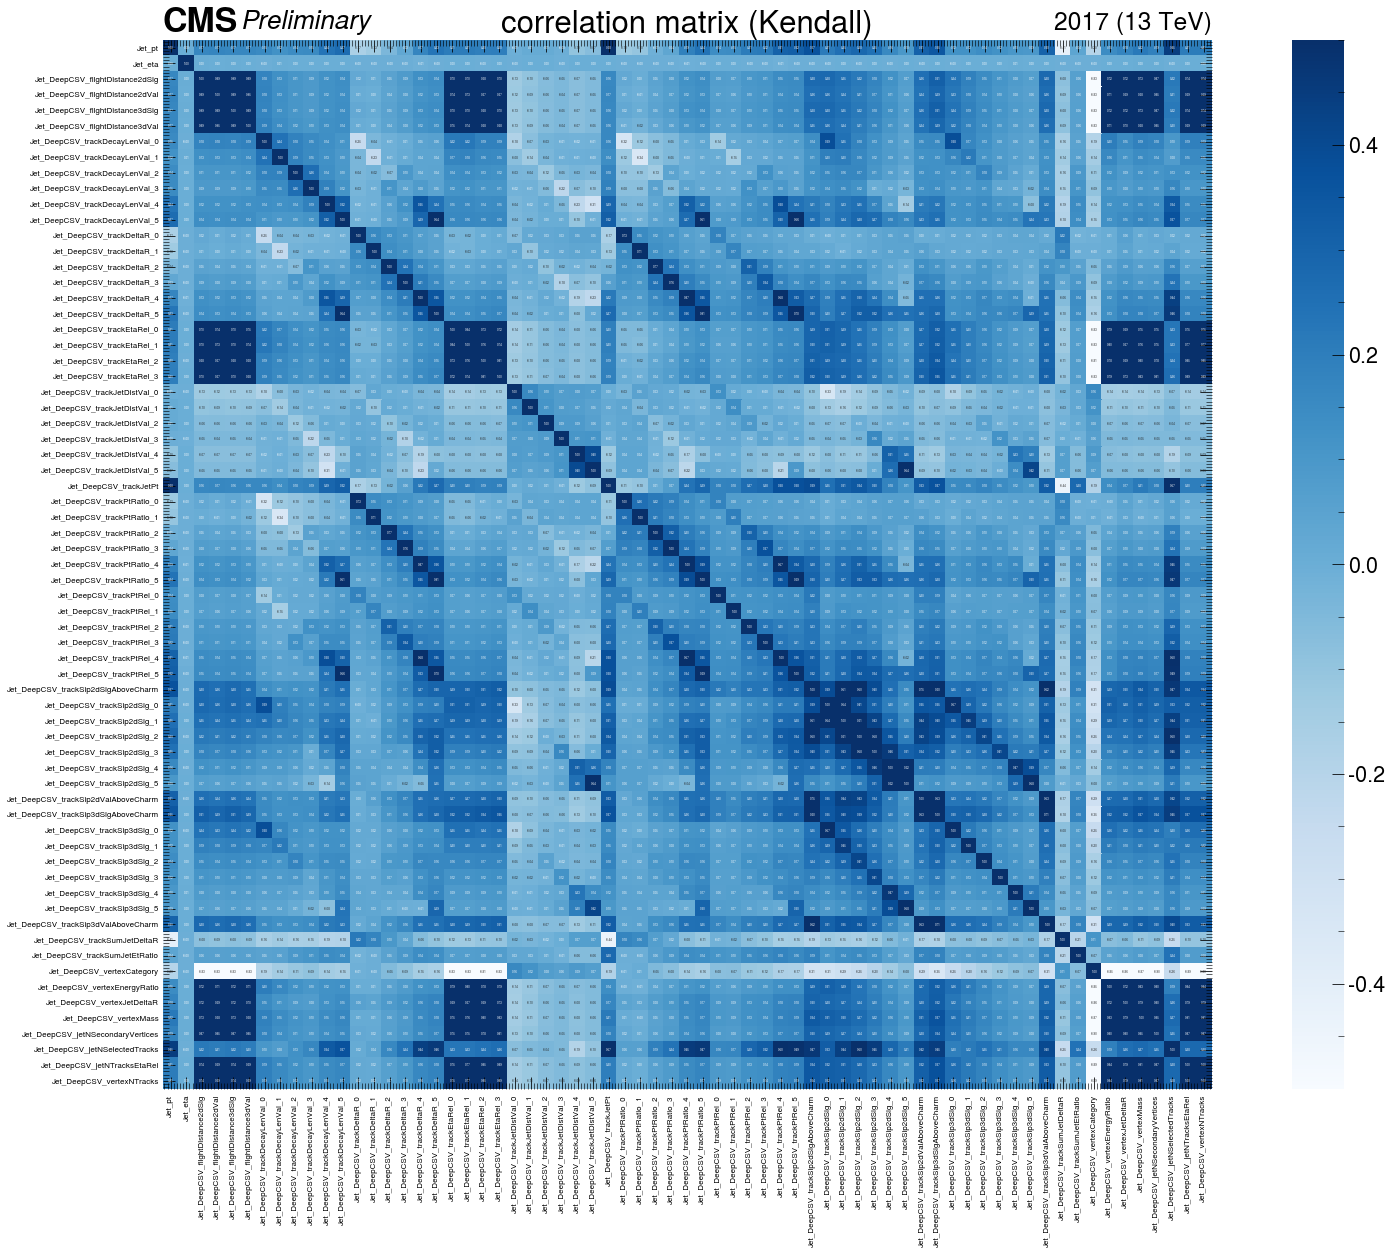

In [89]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Kendall)')
plt.tight_layout()

In [90]:
corr = df[deepCSV_input_branches].corr('spearman')

In [91]:
arr_corr = corr.to_numpy()

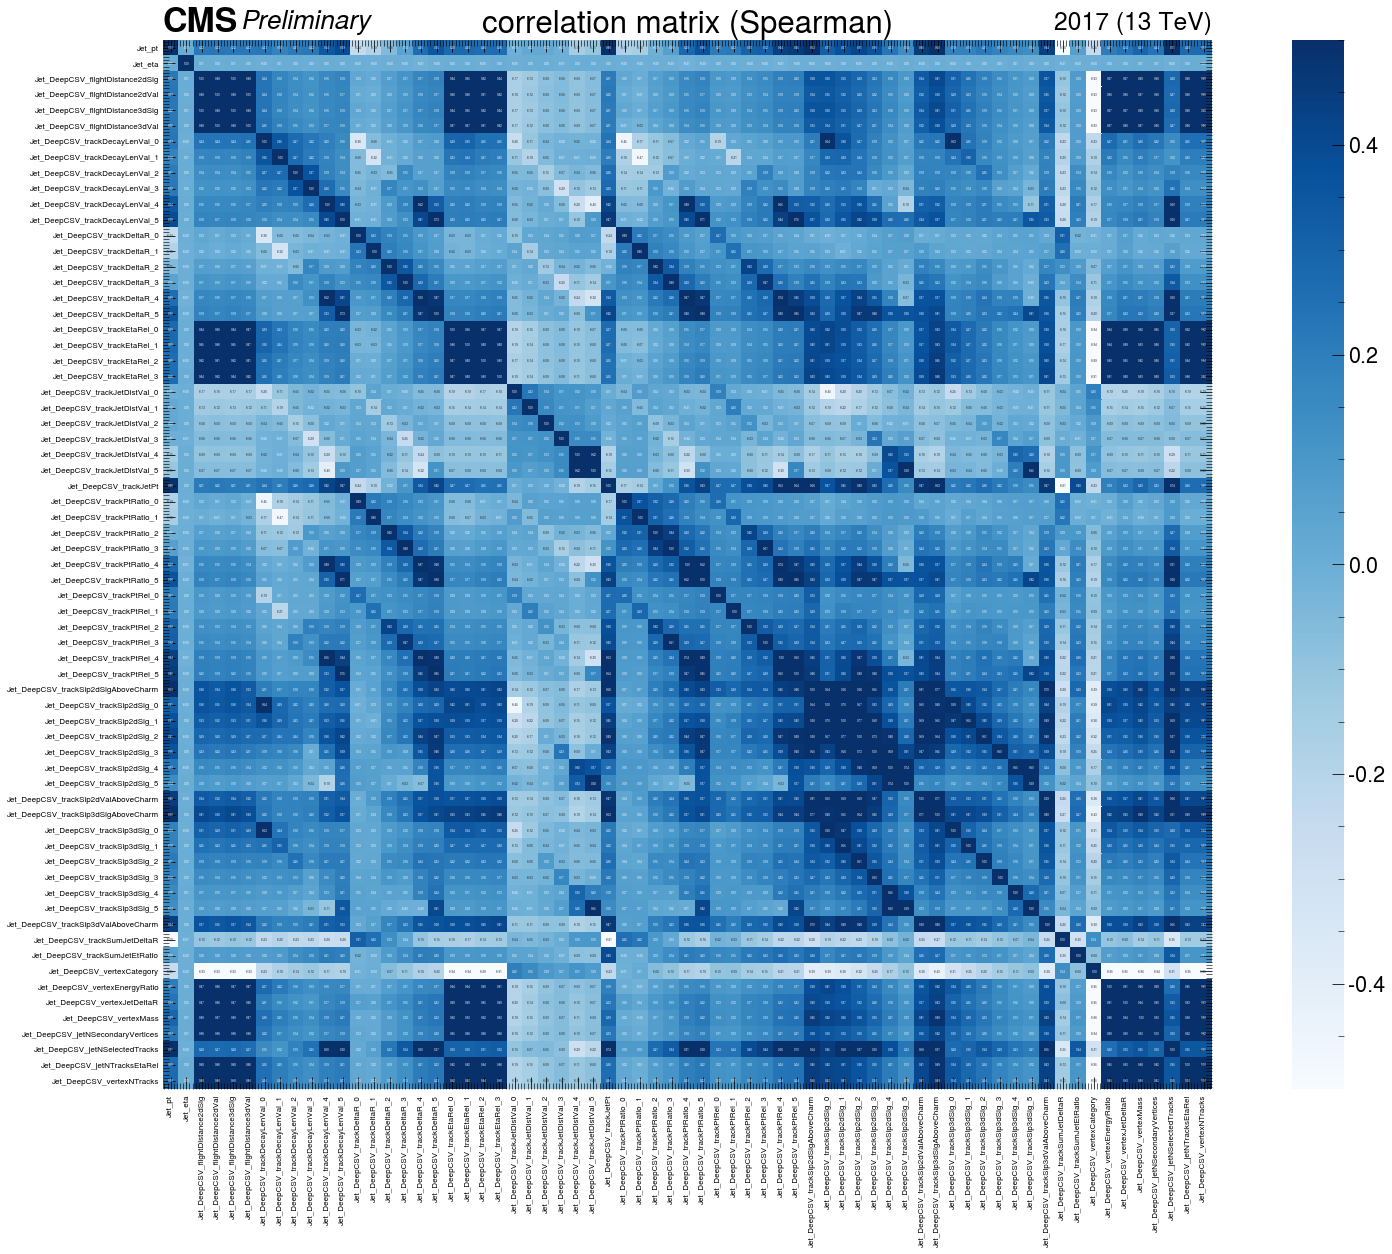

In [92]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Spearman)')
plt.tight_layout()